In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

# Data Visualization & Preprocess

## Data load

In [2]:
df = pd.read_csv("data/world-happiness-report-2019.csv")
df

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


## Data preprocess

In [4]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [5]:
# replace nan with mean
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  0
Generosity                  0
Log of GDP\nper capita      0
Healthy life\nexpectancy    0
dtype: int64

### Add continent column

In [6]:
asia = ["Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
        "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
        "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
        "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
        "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
        "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
        "Cambodia", "Afghanistan", "Yemen", "Syria"]
europe = ["Norway", "Denmark", "Iceland", "Switzerland", "Finland",
          "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
          "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
          "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
          "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
          "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
          "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
          "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
          "Bulgaria", "Albania", "Ukraine"]
north_america = ["Canada", "Costa Rica", "United States", "Mexico",
                 "Panama", "Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                 "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                 "Haiti"]
south_america = ["Chile", "Brazil", "Argentina", "Uruguay",
                 "Colombia", "Ecuador", "Bolivia", "Peru",
                 "Paraguay", "Venezuela"]
australia = ["New Zealand", "Australia"]
d_asia = dict.fromkeys(asia, 'Asia')
d_europe = dict.fromkeys(europe, 'Europe')
d_north_america = dict.fromkeys(north_america, 'North America')
d_south_america = dict.fromkeys(south_america, 'South America')
d_australia = dict.fromkeys(australia, 'Australia')
continent_dict = {**d_asia, **d_europe, **d_north_america, **d_south_america, **d_australia}
df["continent"] = df["Country (region)"].map(continent_dict)
df.continent.fillna("Africa", inplace=True)

In [7]:
df

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Europe
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Europe
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Europe
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Europe
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0,Africa
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0,Africa
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0,Asia
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0,Africa


## Data visualization

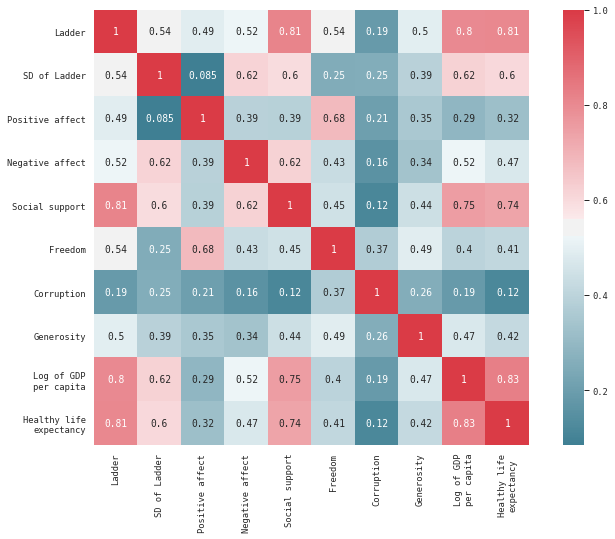

In [8]:
# heatmap using seaborn
# set the context for plotting
sns.set(context="paper", font="monospace")
# set the matplotlib figure
fig, axe = plt.subplots(figsize=(12, 8))
# Generate color palettes
cmap = sns.diverging_palette(220, 10, center="light", as_cmap=True)
# draw the heatmap
sns.heatmap(df.corr(), vmax=1, square=True, cmap=cmap, annot=True)

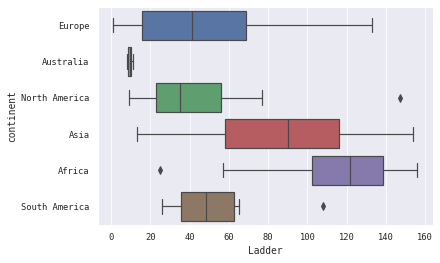

In [9]:
# Continent boxplot
sns.boxplot(x="Ladder", y="continent", data=df)

# Model

## Dataset 

In [10]:
X = df.drop(['Ladder', 'SD of Ladder', 'Country (region)', 'continent'], axis=1)
y = df['Ladder']
X.head()

,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [11]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print("X_train shape {} and size {}".format(X_train.shape, X_train.size))
print("X_test shape {} and size {}".format(X_test.shape, X_test.size))
print("y_train shape {} and size {}".format(y_train.shape, y_train.size))
print("y_test shape {} and size {}".format(y_test.shape, y_test.size))

X_train shape (124, 8) and size 992
X_test shape (32, 8) and size 256
y_train shape (124,) and size 124
y_test shape (32,) and size 32


## Scaling data

In [12]:
# Standardize training and test datasets.
# ==============================================================================
# Feature scaling is to bring all the independent variables in a dataset into
# same scale, to avoid any variable dominating  the model. Here we will not
# transform the dependent variables.
# ==============================================================================
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5, :])
print("test data")
print(X_test[0:5, :])

[[ 1.08139750e+00  1.36880276e+00  1.27592468e-02  1.25018429e+00
   3.84393410e-01  1.56762922e+00  7.58332924e-01 -2.49518261e-02]
 [-8.59666817e-01 -5.64672903e-01 -2.13261696e-01 -1.70003834e+00
   1.39489573e-03 -1.47397285e+00 -1.74705613e+00 -3.85533855e-01]
 [-1.97421343e-01 -3.80532364e-01  3.74392755e-01  4.10505544e-01
  -3.81603619e-01  1.65979898e+00  1.03670948e+00  1.68490489e+00]
 [-1.15653548e+00  1.71889253e-01 -6.65303581e-01 -5.19949287e-01
   1.22451918e+00  7.38101384e-01 -1.23192853e-01 -5.94904065e-01]
 [ 5.37752165e-02  5.17152764e-01 -1.47897897e+00 -1.51848618e+00
  -1.04876232e+00 -1.70439725e+00 -1.19030300e+00 -1.33933148e+00]]
test data
[[ 0.96721725  1.52992573  1.52709956  0.93246801 -0.06037906  1.19895018
   1.45427433  1.28942783]
 [ 1.21841381 -1.39330533  0.51000532  0.50128162 -1.29585814  1.54458678
  -0.33197527  0.12625999]
 [-1.04235522 -0.24242696 -1.00433499 -0.38378517 -0.80166651 -1.54310017
  -1.60786785 -0.87406435]
 [ 0.14511942 -0.3575

## Perform Random Forest Regression

In [13]:
# One Hot Encoding
feature = pd.get_dummies(X)
# List of features for later use
feature_list = list(feature.columns)
features_num = np.size(feature_list)
# Convert to numpy arrays
features = np.array(feature)
print("features numbers: ", features_num)

features numbers:  8


In [14]:
# model apply
ntree_list = [10, 20, 50, 100, 200, 500, 1000]
mtry_list = [int(0.5*features_num**0.5),
             int(features_num**0.5), int(2*features_num**0.5)]
best_ntree = 0
best_mtry = 0
best_error = 9999999999999
best_model = None
best_y_pred = 0
count = 0
total_models = len(ntree_list) * len(mtry_list)
for ntree in ntree_list:
    for mtry in mtry_list:
        count += 1
        print("Training model %i out of %i..." % (count, total_models))
        print("ntree: %i, mtry: %i" % (ntree, mtry))
        rfg = RandomForestRegressor(n_estimators=ntree,
                                    max_features=mtry,
                                    bootstrap=True,
                                    random_state=0)
        rfg.fit(X_train, y_train)
        # predict the test dataset
        y_pred = rfg.predict(X_test)
        # compute square root error
        error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        if error < best_error:
            best_ntree = ntree
            best_mtry = mtry
            best_error = error
            best_model = rfg
            print("Found new optimal model")
            print(best_model)
            print("The error of model RFR : %6f" % best_error)
            print("best_ntree: %i, best_mtry: %i" % (best_ntree, best_mtry))
            print(
                "========================================================================")
# print optimal results
print("========================================================================")
print('Finished tuning model')
print('Optimal model')
print(best_model)
print("The error of model RFR : %6f" % best_error)
print("best_ntree: %i, best_mtry: %i" % (best_ntree, best_mtry))

Training model 1 out of 21...
ntree: 10, mtry: 1
Found new optimal model
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
The error of model RFR : 23.969799
best_ntree: 10, best_mtry: 1
Training model 2 out of 21...
ntree: 10, mtry: 2
Found new optimal model
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      m

# Result Analysis

## Predication VS Reality

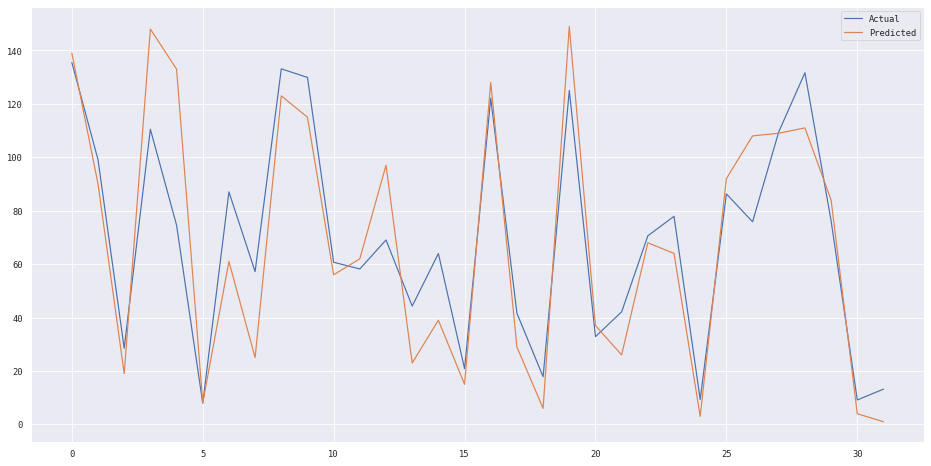

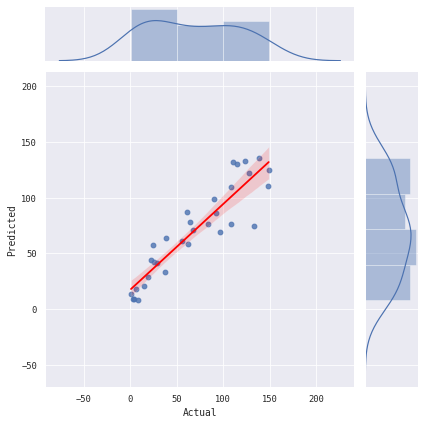

In [15]:
# predict the test dataset
y_pred = best_model.predict(X_test)
test = pd.DataFrame({'Predicted': y_pred,
                     'Actual': y_test})
fig = plt.figure(figsize=(16, 8))
test = test.reset_index()
test = test.drop(['index'], axis=1)
plt.plot(test[:50])
plt.legend(['Actual', 'Predicted'])
sns.jointplot(x='Actual', y='Predicted', data=test, kind="reg",
              joint_kws={'line_kws': {'color': 'red'}})

## Feature Importance

In [16]:
# Get numerical feature importances
importances = list(best_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2))
                       for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
# Print out the feature and importances
[print('Variable: {:20}    Importance: {}'.format(*pair))
 for pair in feature_importances]

Variable: Social support          Importance: 0.42
Variable: Healthy life
expectancy    Importance: 0.27
Variable: Log of GDP
per capita    Importance: 0.15
Variable: Positive affect         Importance: 0.06
Variable: Negative affect         Importance: 0.03
Variable: Freedom                 Importance: 0.03
Variable: Corruption              Importance: 0.02
Variable: Generosity              Importance: 0.02


[None, None, None, None, None, None, None, None]

In [17]:
def features(feature_importances):
    # sorted importances of features
    feature_list = [x[0] for x in feature_importances][::-1]
    importances = [x[1] for x in feature_importances][::-1]
    # list of x locations for plotting
    y_values = list(range(len(importances)))
    # Make a bar chart
    plt.barh(y_values, importances, orientation='horizontal',
             color='r', edgecolor='k', linewidth=1.2)
    # Tick labels for x axis
    plt.yticks(y_values, feature_list, rotation='horizontal')
    # Axis labels and title
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.show()

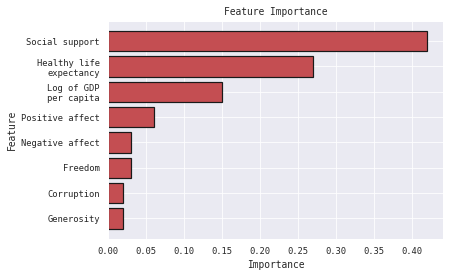

In [18]:
# feature importance
features(feature_importances)

## Result Evealuation

In [19]:
# Evaluate the data
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 14.735937499999999
MSE 378.988671875
RMSE 19.46763138840984


In [20]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.8339077960762831